In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Importing the Datasets

In [20]:
fake = pd.read_csv("https://raw.githubusercontent.com/laxmimerit/fake-real-news-dataset/main/data/Fake.csv")
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [21]:
real = pd.read_csv("https://raw.githubusercontent.com/laxmimerit/fake-real-news-dataset/main/data/True.csv")
real.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


# EDA

In [11]:
print("Real Dataset Subject Matters:\n",real["subject"].value_counts())
print("\n\nFake Dataset Subject Matters:\n",fake["subject"].value_counts())

Real Dataset Subject Matters:
 subject
politicsNews    11272
worldnews       10145
Name: count, dtype: int64


Fake Dataset Subject Matters:
 subject
News               9050
politics           6841
left-news          4459
Government News    1570
US_News             783
Middle-east         778
Name: count, dtype: int64


C:\Users\Amo\AppData\Local\Temp\ipykernel_19224\866887975.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(labels=real["subject"].value_counts().index,rotation=45)
C:\Users\Amo\AppData\Local\Temp\ipykernel_19224\866887975.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(labels=fake["subject"].value_counts().index,rotation=45)


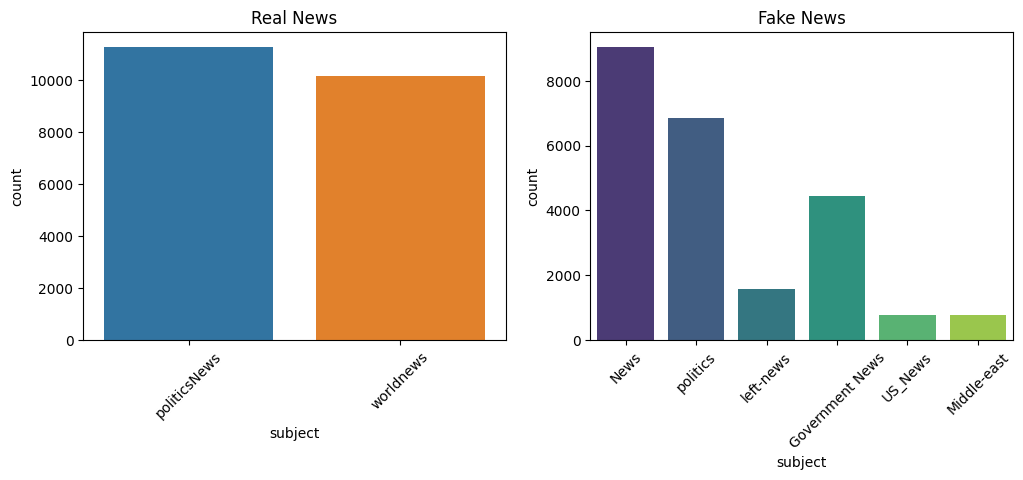

In [42]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
sns.countplot(x="subject",hue="subject", data=real, ax=ax1, legend=False)
ax1.set_title("Real News")
ax1.set_xticklabels(labels=real["subject"].value_counts().index,rotation=45)
sns.countplot(x="subject",hue="subject", data=fake, ax=ax2, palette="viridis")
ax2.set_title("Fake News")
ax2.set_xticklabels(labels=fake["subject"].value_counts().index,rotation=45)
plt.show()


## Wordcloud

In [53]:
rnews = " ".join(real["text"].to_list())
fnews = " ".join(fake["text"].to_list())

### Real news

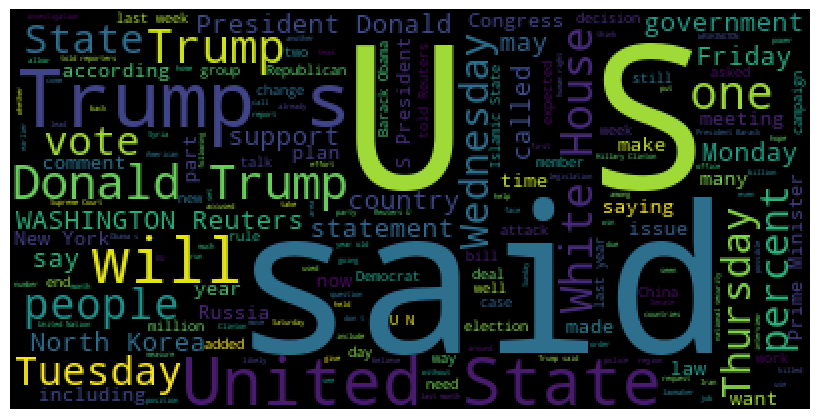

In [54]:
plt.figure(figsize=(8,4))
rwordcloud = WordCloud().generate(rnews)
plt.imshow(rwordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

### Fake News

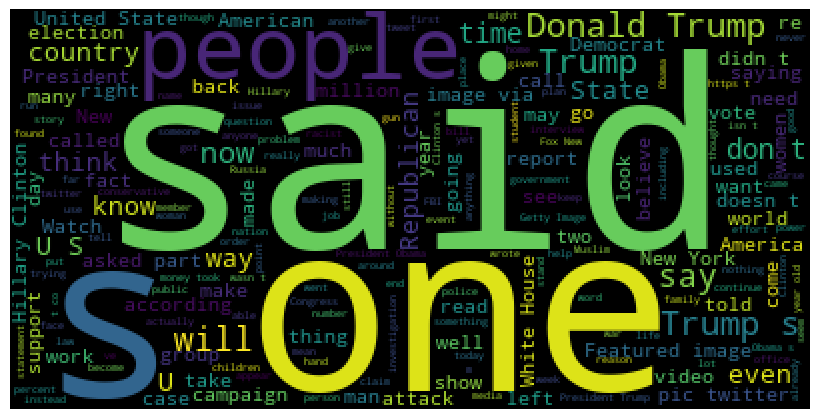

In [55]:
plt.figure(figsize=(8,4))
fwordcloud = WordCloud().generate(fnews)
plt.imshow(fwordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

# Creating the dataset

In [28]:
real.text.head()
real['class'] = 0
fake['class'] = 1

0    WASHINGTON (Reuters) - The head of a conservat...
1    WASHINGTON (Reuters) - Transgender people will...
2    WASHINGTON (Reuters) - The special counsel inv...
3    WASHINGTON (Reuters) - Trump campaign adviser ...
4    SEATTLE/WASHINGTON (Reuters) - President Donal...
Name: text, dtype: object

## Removing the publication source from the real news dataset

In [29]:
def split_and_join(text):
    # Find the position of the first '-' within the first 120 characters
    pos = text.find('-')
    if pos != -1 and pos < 120:  # Check if '-' was found and within the first 120 characters
        parts = text[pos+1:].split('-')  # Split from the first '-' found
        return '-'.join(parts).strip()  # Join all parts after the first '-' and strip any leading/trailing whitespace
    return None

real['text'] = real['text'].apply(split_and_join)
real.head(10)

,title,text,subject,date,class
0,"As U.S. budget fight looms, Republicans flip t...",The head of a conservative Republican faction ...,politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,Transgender people will be allowed for the fir...,politicsNews,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,The special counsel investigation of links bet...,politicsNews,"December 31, 2017",0
3,FBI Russia probe helped by Australian diplomat...,Trump campaign adviser George Papadopoulos tol...,politicsNews,"December 30, 2017",0
4,Trump wants Postal Service to charge 'much mor...,President Donald Trump called on the U.S. Post...,politicsNews,"December 29, 2017",0
5,"White House, Congress prepare for talks on spe...",The White House said on Friday it was set to k...,politicsNews,"December 29, 2017",0
6,"Trump says Russia probe will be fair, but time...",President Donald Trump said on Thursday he bel...,politicsNews,"December 29, 2017",0
7,Factbox: Trump on Twitter (Dec 29) - Approval ...,None,politicsNews,"December 29, 2017",0
8,Trump on Twitter (Dec 28) - Global Warming,None,politicsNews,"December 29, 2017",0
9,Alabama official to certify Senator-elect Jone...,Alabama Secretary of State John Merrill said h...,politicsNews,"December 28, 2017",0


In [30]:
data = pd.concat([real, fake], axis=0)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44898 entries, 0 to 23480
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44676 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   class    44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 2.1+ MB


In [36]:
data.dropna(axis=0, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44676 entries, 0 to 23480
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44676 non-null  object
 1   text     44676 non-null  object
 2   subject  44676 non-null  object
 3   date     44676 non-null  object
 4   class    44676 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 2.0+ MB


In [38]:
data.drop(["subject", "date"], axis=1, inplace=True)
data.head()

,title,text,class
0,"As U.S. budget fight looms, Republicans flip t...",The head of a conservative Republican faction ...,0
1,U.S. military to accept transgender recruits o...,Transgender people will be allowed for the fir...,0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,The special counsel investigation of links bet...,0
3,FBI Russia probe helped by Australian diplomat...,Trump campaign adviser George Papadopoulos tol...,0
4,Trump wants Postal Service to charge 'much mor...,President Donald Trump called on the U.S. Post...,0


In [51]:
data['processed_text'] = data.apply(lambda row: '\n'.join([row['title'], row['text']]), axis=1)
data.head()

,title,text,class,processed_text
7435,Alabama GOP Bill Would Ban Poor People From H...,"Once again, Republicans have found another cru...",1,Alabama GOP Bill Would Ban Poor People From H...
1209,Firm behind Trump dossier declines to respond ...,The U.S. political research firm that commissi...,0,Firm behind Trump dossier declines to respond ...
4828,Mexico’s President Confirms Trump LIED: He To...,After his joint press conference with Mexican ...,1,Mexico’s President Confirms Trump LIED: He To...
19528,BREAKING: NO CHARGES For Police Officer In Sho...,Riots erupted in Charlotte after police office...,1,BREAKING: NO CHARGES For Police Officer In Sho...
5098,New Study PROVES It’s Republicans Who Are To ...,When Donald Trump isn t busy insulting Gold St...,1,New Study PROVES It’s Republicans Who Are To ...


In [52]:
processed_data = data[["processed_text", "class"]]
processed_data.head()

,processed_text,class
7435,Alabama GOP Bill Would Ban Poor People From H...,1
1209,Firm behind Trump dossier declines to respond ...,0
4828,Mexico’s President Confirms Trump LIED: He To...,1
19528,BREAKING: NO CHARGES For Police Officer In Sho...,1
5098,New Study PROVES It’s Republicans Who Are To ...,1


# Shuffle the Data

In [44]:
data = data.sample(frac=1)

# Save the dataset

In [53]:
processed_data.to_csv('fake-news-dataset.csv', index=False)

In [54]:
datac = pd.read_csv('fake-news-dataset.csv')
datac.head(11)

,processed_text,class
0,Alabama GOP Bill Would Ban Poor People From H...,1
1,Firm behind Trump dossier declines to respond ...,0
2,Mexico’s President Confirms Trump LIED: He To...,1
3,BREAKING: NO CHARGES For Police Officer In Sho...,1
4,New Study PROVES It’s Republicans Who Are To ...,1
5,Syria's Deir al-Zor air base working again: st...,0
6,Pennsylvania bans bias against transgender peo...,0
7,UPDATE: 40% OF VICTIM’S SKULL IS MISSING…No Ne...,1
8,Trump Just Threatened To Murder 25 Million Pe...,1
9,Professor: Political Ignorance is “Going To Ha...,1


In [56]:
len(datac.columns)

2

In [69]:
import pandas as np
X = datac.iloc[:,0]


In [70]:
X

0         Alabama GOP Bill Would Ban Poor People From H...
1        Firm behind Trump dossier declines to respond ...
2         Mexico’s President Confirms Trump LIED: He To...
3        BREAKING: NO CHARGES For Police Officer In Sho...
4         New Study PROVES It’s Republicans Who Are To ...
                               ...                        
44671    Iran's quake death toll rises to 530, more tha...
44672    Kentucky lawmaker a 'probable suicide' amid se...
44673    U.S. military can withstand the sage grouse, l...
44674    WATCH: CNN HOST GETS SCHOOLED By Guest After C...
44675     Charles Koch Has The Sads Because He Thinks H...
Name: processed_text, Length: 44676, dtype: object